# English Movie Level Prediction

# Поиск отклонений (выбросов)


**! описание заменить !**

---

**Входные данные**

Таблица, содержащая:  
- названия фильмов;
- рейтинг, выставленный экспертом;
- текстовое поле, содержащее слова из субтитров.

---

**Цель**

Оценить разделяемость на кластеры по CEFR-уровню сложности субтитров.

---

**Задачи:**  

- создать трансоформер данных с использованием **TfidfVectorizer**;  
- уменьшить размерность данных до 2-х, используя **TruncatedSVD**;  
- учесть в трансформере возможность обработки дополнительных числовых признаков;  
- подготовить данные с помощью разработанного трансформера;  
- сделать оценку выбросов с помощью **OneClassSVM**;  
- построить статичный график;  
- построить интерактивный график с помощью **Plotly**;  
- сделать табличный вывод для оценки выбросов.

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Initial" data-toc-modified-id="Initial-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Constants" data-toc-modified-id="Constants-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Settings" data-toc-modified-id="Settings-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Settings</a></span></li></ul></li><li><span><a href="#Read-and-Check-data" data-toc-modified-id="Read-and-Check-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read and Check data</a></span><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read data</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выделение-данных-для-обработики-и-анализа" data-toc-modified-id="Выделение-данных-для-обработики-и-анализа-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выделение данных для обработики и анализа</a></span></li><li><span><a href="#Data-transformer" data-toc-modified-id="Data-transformer-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data transformer</a></span><ul class="toc-item"><li><span><a href="#Предбработка-числовых-признаков" data-toc-modified-id="Предбработка-числовых-признаков-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Предбработка числовых признаков</a></span></li><li><span><a href="#Предбработка-категориальных-признаков" data-toc-modified-id="Предбработка-категориальных-признаков-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Предбработка категориальных признаков</a></span></li><li><span><a href="#Объединение-предобработки-числовых-и-категориальных-признаков" data-toc-modified-id="Объединение-предобработки-числовых-и-категориальных-признаков-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Объединение предобработки числовых и категориальных признаков</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подготовка данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Interactive-chart-–-Plotly" data-toc-modified-id="Interactive-chart-–-Plotly-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Interactive chart – Plotly</a></span></li><li><span><a href="#Static-chart" data-toc-modified-id="Static-chart-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Static chart</a></span></li><li><span><a href="#Table-for-outliers-detection" data-toc-modified-id="Table-for-outliers-detection-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Table for outliers detection</a></span></li></ul></li></ul></div>

---

## Intro

**Some explanations**

Permanent data tables named like: **data**.  
Temporary data tables named like: **df**.  

The code of the cells are as independent as possible from each other in order to freely manipulate the cells.

Intermediate conclusions are highlighted as follows:

> Intermediate conclusion.

---

## Initial

### Imports

In [27]:
import pandas as pd
import numpy as np

import os
import json
import warnings
import joblib
from datetime import date, time, datetime
from time import time

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion

from nltk.corpus import stopwords

from sklearn.svm import LinearSVC, OneClassSVM

### Constants

In [28]:
PATH_LOCAL = 'datasets/'                               # local path to data
PATH_REMOTE = '/datasets/'                             # remote path to data
PATH_RESULTS_LOCAL = 'results/'                        # local path for results
PATH_RESULTS_REMOTE = '/results/'                      # remote path for results

CR = '\n'                                              # new line

OUTLIER_FRAC = 0.01                                    # пороговое значение (доля) объектов, относимых к выбросам

RANDOM_STATE = RANDOM_SEED = RS = 88                   # random_state

### Functions

In [29]:
def custom_read_csv(file_name, separator=','):
    """
    reading dataset of .csv format:
       first from local storage;
       if unsuccessful from remote storage.
    """

    path_local = f'{PATH_LOCAL}{file_name}'
    path_remote = f'{PATH_REMOTE}{file_name}'
    
    if os.path.exists(path_local):
        return pd.read_csv(path_local, sep=separator)

    elif os.path.exists(path_remote):
        return pd.read_csv(path_remote, sep=separator)

    else:
        print(f'File "{file_name}" not found at the specified path ')

### Settings

In [30]:
# text styles
class f:
    BOLD = "\033[1m"
    ITALIC = "\033[3m"
    END = "\033[0m"

In [31]:
# defaults for charts

# Matplotlib, Seaborn
PLOT_DPI = 150  # dpi for charts rendering 
sns.set_style('whitegrid', {'axes.facecolor': '0.98', 'grid.color': '0.9', 'axes.edgecolor': '1.0'})
plt.rc(
       'axes',
       labelweight='bold',
       titlesize=16,
       titlepad=10,
      )

# Plotly Graph_Objects
pio.templates['my_theme'] = go.layout.Template(
                                               layout_autosize=True,
                                               # width=900,
                                               layout_height=200,
                                               layout_legend_orientation="h",
                                               layout_margin=dict(t=40, b=40),         # (l=0, r=0, b=0, t=0, pad=0)
                                               layout_template='seaborn',
                                              )
pio.templates.default = 'my_theme'

# colors, color schemes
CMAP_SYMMETRIC = LinearSegmentedColormap.from_list('', ['steelblue', 'aliceblue', 'steelblue'])

In [32]:
# Pandas defaults
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.colheader_justify = 'left'

In [33]:
# стиль таблиц
table_style = [
               dict(selector='caption',
                    props=[
                           ('text-align', 'center'),
                           ('font-size', '140%'),
                           ('font-weight', 'bold'),
                           ('color', 'dimgray'),
                          ]
                   )
              ]

In [34]:
# others
warnings.filterwarnings('ignore')

---

## Read and Check data

### Read data

In [35]:
data = custom_read_csv('EDA_movies_subtitles.csv')

In [36]:
data.sample()

,Movie,Level,Subtitles
234,Bullet train,B1,columbia picture fanfare playing the boom slang stolen from the zoo last night extremely dangero...


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      514 non-null    object
 1   Level      514 non-null    object
 2   Subtitles  514 non-null    object
dtypes: object(3)
memory usage: 12.2+ KB


---

## Подготовка данных

### Выделение данных для обработики и анализа

In [38]:
X = data[['Subtitles']]

X.shape

(514, 1)

### Data transformer

In [39]:
class TextSelector(BaseEstimator, TransformerMixin):
    '''
    Позволяет выбрать указанный признак для последующей обработки
    '''
    def __init__(self, field):
        self.field = field
    def fit(self, X, Y=None):
        return self
    def transform(self, X):
        return X[self.field]

#### Предбработка числовых признаков

In [40]:
num_selector = make_column_selector(dtype_include=np.number)

num_preprocessor = make_pipeline(
                                 IterativeImputer(initial_strategy='mean', random_state=RS),
                                 StandardScaler(),
                                )

num_transformer = make_column_transformer(
                                          (num_preprocessor, num_selector),
                                          remainder='drop'
                                         )

#### Предбработка категориальных признаков

Категориальный признак только один – содержащий субтитры. По крайней мере, пока.

In [41]:
# стандартный список стоп-слов
stopwords_english = stopwords.words('english')

# списка стоп-слов: восклицания, имена, географические названия
for sheet in ['exclamation','name','geo']:
    new_stopwords = pd.read_excel(f'{PATH_LOCAL}stopwords.xlsx', sheet_name=sheet)['words'].str.lower().to_list()
    stopwords_english.extend(new_stopwords)

# удаление дубликатов на всякий случай 
stopwords_english = sorted(list(set(stopwords_english)))

In [42]:
text_transformer = Pipeline([
                              ('TEXT_SELECT', TextSelector('Subtitles')),
                              ('TFIDF', TfidfVectorizer(
                                                        decode_error='ignore',
                                                        stop_words=stopwords_english,
                                                        token_pattern=r'(?u)\b[a-z]{3,}\b',      # токены из 3-х и более букв
                                                        smooth_idf=True)
                                                       ),
                              ('TRUNC', TruncatedSVD())
                             ])

#### Объединение предобработки числовых и категориальных признаков

In [43]:
data_transformer = FeatureUnion([
                                 ('TEXT', text_transformer),
                                 ('NUM', num_transformer),
                                ])

### Подготовка данных

In [44]:
# обучение трансформера и преобразование данных
X = data_transformer.fit_transform(X)

# классификатор для анализа выбросов
clf = OneClassSVM(kernel='rbf').fit(X)

# значение решающей функции от классификатора
data['decision_function'] = clf.decision_function(X)

# определение порогового значения 
threshold = np.percentile(data.decision_function, 100 * OUTLIER_FRAC)

# соотнесение значения решающей функции и порогового значения для входных данных
data['is_inlier'] = data.decision_function > threshold

In [45]:
# дооформление данных
X = (
     pd.DataFrame(X)                                              # преобразование массива в dataframe
     .join(data)                                                  # добавление инфо (детальная инфо для графиков)
     .rename(columns={0:'x',1:'y'})                               # координаты для вывода точек на графиках
    )

## Анализ

In [46]:
# расчет диапазона значений координатной сетки

k = 0.2    # отстут по краям (чтобы точки не попадали на границу графика)

x_min, x_max, y_min, y_max = X.x.min(), X.x.max(), X.y.min(), X.y.max()
delta_x, delta_y = x_max - x_min, y_max - y_min

x_min -= k*delta_x
x_max += k*delta_x
y_min -= k*delta_y
y_max += k*delta_y

### Interactive chart – Plotly

In [47]:
df = X.drop(['Subtitles'], axis=1)

In [48]:
# подготовка шаблона для hovertemplate
hover_template = ''
for i, field in enumerate(df.columns):
    hover_template += field + ': %{customdata['+ str(i) +']}' + '<br>'

# диапазон вывода по осям
# axis_limit = df[['x','y']].max().max() * 1.2

# градиент для фона
custom_colorscale = [[0, 'black'], [0.3, 'grey'], [1, 'white']]

# создание координатной сетки
# xx, yy = np.meshgrid(np.linspace(-axis_limit, axis_limit, 100), np.linspace(-axis_limit, axis_limit, 100))
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [49]:
fig = go.Figure(
                layout=go.Layout(
                                 title='Clusters and Outliers Detection',
                                 width=900, height=600, margin=dict(l=30,r=30,b=30,t=30),
                                )
               )

fig.add_trace(
              go.Contour(
                         x=np.linspace(x_min, x_max, 100),
                         y=np.linspace(y_min, y_max, 100),
                         z=Z,
                         line_smoothing=1,
                         contours_coloring='heatmap',
                         ncontours=6,
                         colorscale=custom_colorscale,
                         showscale=False,
                         hoverinfo='skip',
                        ),
             )

fig.add_trace(
              go.Contour(
                         x=np.linspace(x_min, x_max, 100),
                         y=np.linspace(y_min, y_max, 100),
                         z=Z,
                         contours_coloring='lines',
                         contours={'value':threshold,'type':'constraint'},
                         line={'color':'red','width':3},
                         name='threshold',
                         hoverinfo='skip',
                        )
             )

fig.add_trace(
              go.Scatter(
                         x=df.query('~is_inlier').x,
                         y=df.query('~is_inlier').y,
                         mode='markers',
                         marker={'size':12,'color':'white','line_width':1},
                         name='{:.0%} objects outside threshold'.format(OUTLIER_FRAC),
                         customdata=df.query('~is_inlier'),
                         hovertemplate=hover_template
                        )
             )

fig.add_trace(
              go.Scatter(
                         x=df.query('is_inlier').x,
                         y=df.query('is_inlier').y,
                         mode='markers',
                         marker={'size':10,'color':'black','line_width':1,'line_color':'white'},
                         name='{:.0%} objects inside threshold'.format(1-OUTLIER_FRAC),
                         customdata=df.query('is_inlier'),
                         hovertemplate=hover_template,
                        )
             )

fig.show()

In [50]:
# Сохранение графика в HTML файле
pio.write_html(fig, file=f'{PATH_RESULTS_LOCAL}movie_subtitles_projection.html', auto_open=False)

> Фильмы разделились на 3 кластера:  
> - уровень A1;  
> - уровень B2 и C1;  
> - смешанный кластер.
>
> В смешанном кластере (посередине) помимо ожидаемых уровней A2 и B1 нередко встречаются уровни B2 и даже C1.  
> Необходимо тщательно изучить эти фильмы. Возможно варианты:  
> - уровень этих фильмов изначально указан неверно;  
> - двух измерений недостаточно, чтобы выделить необходимое количество кластеров;  
> - этот простой анализ не учитывает какие-либо важные характеристики, чтобы выделить нужные кластеры.

> Очевидных выбросов не наблюдается.

### Static chart

Статичный график может пригодиться на тот случай, если интерактивный график будет недоступен по каким-либо причинам.

In [54]:
# создание координатной сетки.
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

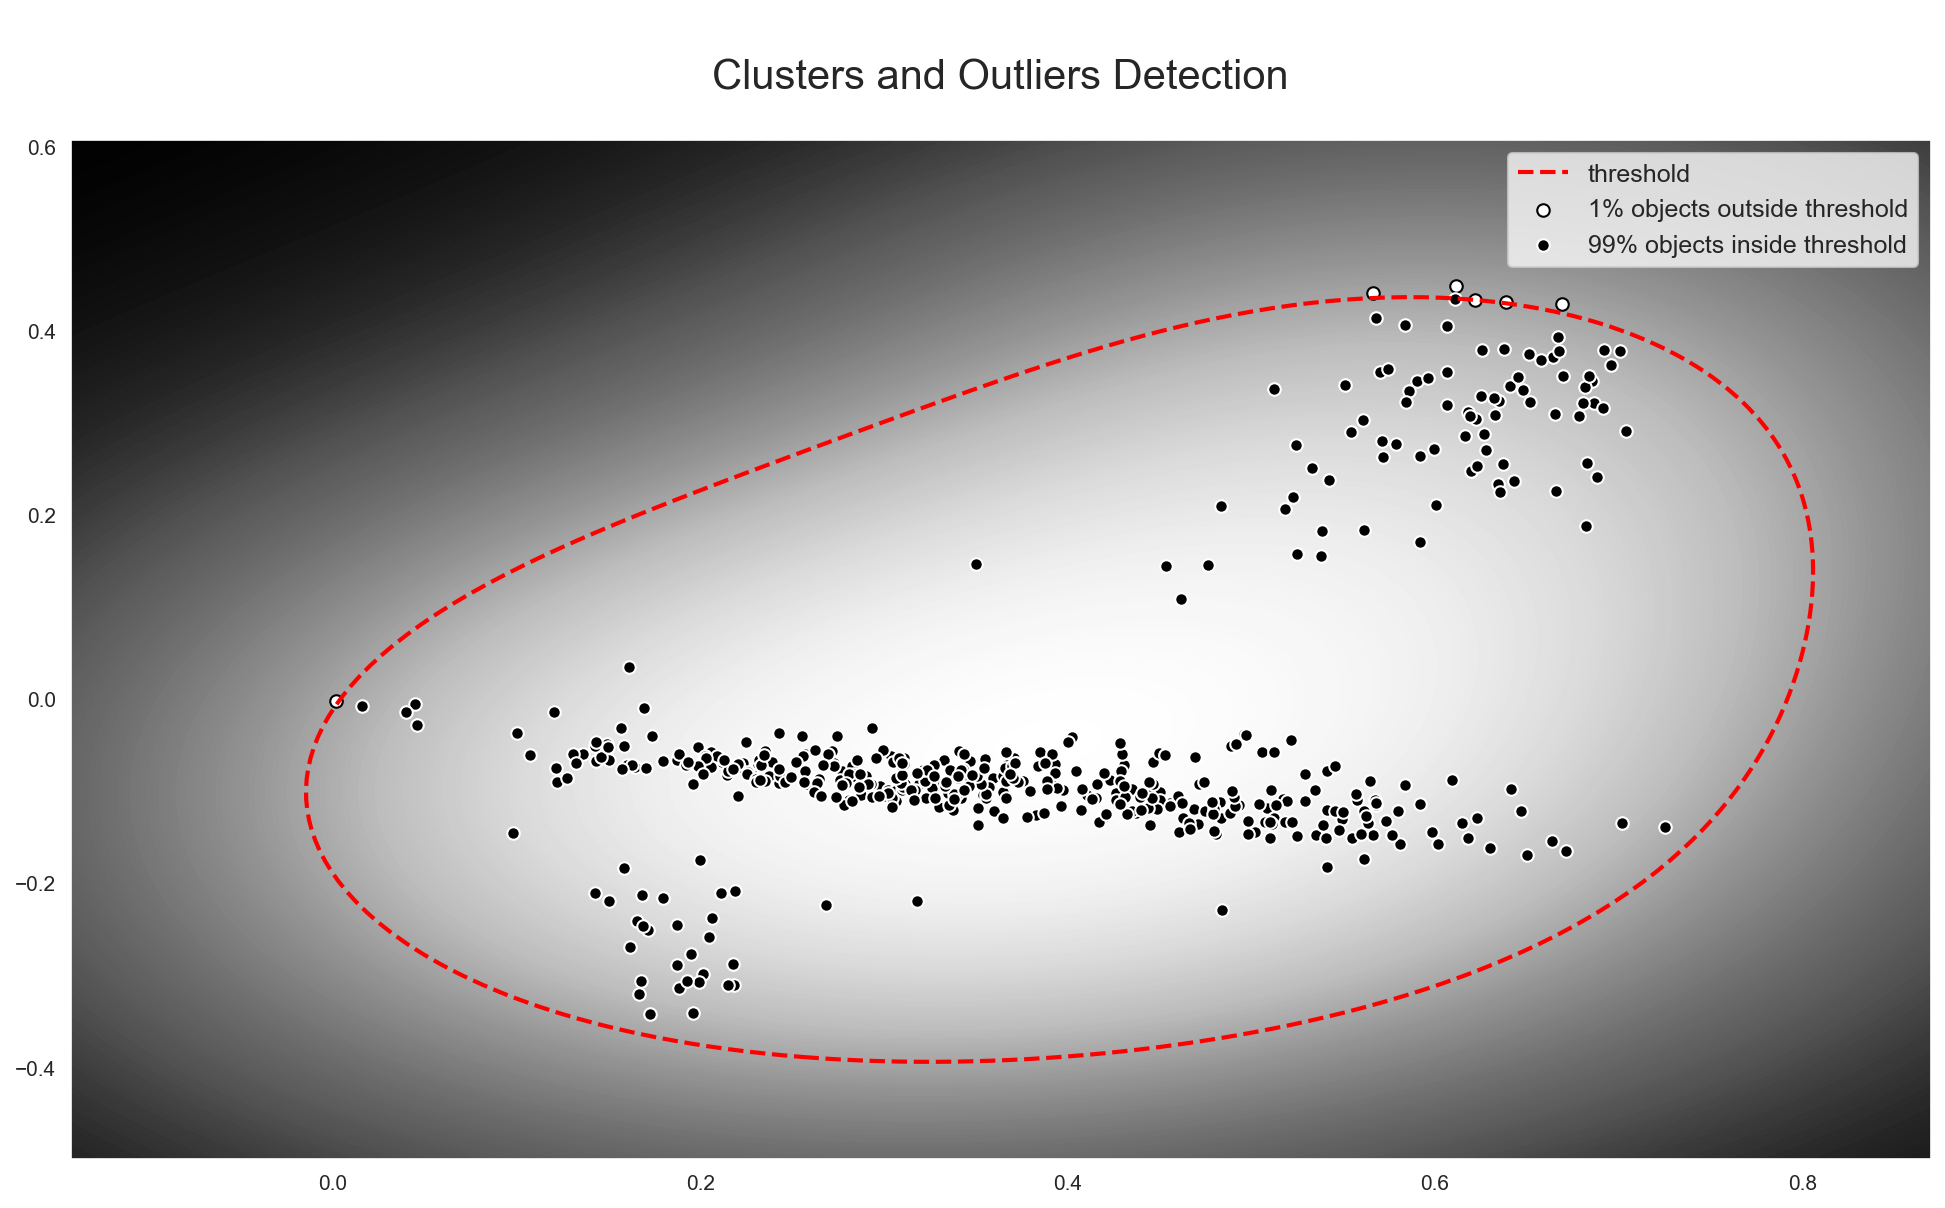

In [55]:
fig, ax = plt.subplots(figsize=(16,9), dpi=PLOT_DPI)

# ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 200), cmap='Blues_r') # заполнение от границы выделенной области к краю
ax.contourf(xx, yy, Z, levels=200, cmap='Greys_r')                                    # заполнение от центра к краю
border = ax.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')        # граница выделенной области
# ax.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='teal')                  # заполнение облаcти внутри границы

outliers = ax.scatter(X.query('~is_inlier').x, X.query('~is_inlier').y, c='white', edgecolors='black') # точки вне области (outliers)
inliers = ax.scatter(X.query('is_inlier').x, X.query('is_inlier').y, c='black', edgecolors='white')    # точки внутри области (inliers)

ax.set_title(f'{CR}Clusters and Outliers Detection', fontsize=20, pad=25)
ax.legend(
          [border.collections[0], outliers, inliers],
          ['threshold',
           f'{OUTLIER_FRAC:0.0%} objects outside threshold',
           f'{1-OUTLIER_FRAC:0.0%} objects inside threshold',
          ],
#           loc='lower left',
          fontsize=12
         )

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()

### Table for outliers detection

In [53]:
df = data.drop('Subtitles', axis=1)

display(
        df
        .sort_values('decision_function')
        .style
            .set_table_styles(table_style)
            .set_caption(f'Outliers detection, outlier fraction = {OUTLIER_FRAC}')
            .set_precision(2)
            .background_gradient('RdYlGn', subset=['decision_function'])
            .format('{:.1f}', subset=['decision_function'])
        )

,Movie,Level,decision_function,is_inlier
213,Suits S04E06 EngSub,C1,-57.7,False
157,Suits.Episode 11- Blowback,B2,-56.7,False
189,Suits.S02E07.Sucker.Punch.PROPER.HDTV.x264-FQM,B2,-56.1,False
330,The.Umbrella.Academy.S03E07.720p.WEB.h264-KOGi-en-forced,A2,-55.2,False
169,Suits.Episode 8- Mea Culpa,B2,-55.2,False
138,Crazy4TV.com - Suits.S06E04.720p.BluRay.x265.HEVC.Crazy4ad,B2,-54.9,False
158,Suits.Episode 12- Live to Fight,B2,-54.7,True
328,The.Umbrella.Academy.S03E06.720p.WEB.h264-KOGi-en-forced,A2,-51.2,True
214,Suits S04E07 EngSub,C1,-51.2,True
161,Suits.Episode 15- Tick Tock,B2,-50.3,True
